# Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In C:\Users\Mirna Elizondo\anaconda3\envs\condaEnv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Mirna Elizondo\anaconda3\envs\condaEnv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Mirna Elizondo\anaconda3\envs\condaEnv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Mirna Elizondo\anaconda3\envs\condaEnv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Mirna Elizondo\anaconda3\envs\condaEnv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was depr

In [2]:
train = pd.read_csv('../data/train.csv', header=0)
test = pd.read_csv('../data/test.csv', header=0)

In [3]:
train

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [4]:
train.columns = train.columns.str.replace(r'\[.*?\] ', '', regex=True)
test.columns = test.columns.str.replace(r'\[.*?\]', '', regex=True)
print(train.shape)
print(test.shape)

(136429, 14)
(90954, 13)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [6]:
train.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [8]:
df = train.append(test)

In [9]:
df.shape

(227383, 19)

In [10]:
df.dtypes

id                           int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]     float64
Torque [Nm]                float64
Tool wear [min]            float64
Machine failure            float64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
Air temperature            float64
Process temperature        float64
Rotational speed           float64
Torque                     float64
Tool wear                  float64
dtype: object

In [11]:
print(df.isna().sum())

id                              0
Product ID                      0
Type                            0
Air temperature [K]         90954
Process temperature [K]     90954
Rotational speed [rpm]      90954
Torque [Nm]                 90954
Tool wear [min]             90954
Machine failure             90954
TWF                             0
HDF                             0
PWF                             0
OSF                             0
RNF                             0
Air temperature            136429
Process temperature        136429
Rotational speed           136429
Torque                     136429
Tool wear                  136429
dtype: int64


In [12]:
df.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
count,227383.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,227383.000000,227383.000000,227383.000000,227383.000000,227383.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000
mean,113691.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001522,0.005233,0.002379,0.003923,0.002278,299.859493,309.939375,1520.528179,40.335191,104.293962
std,65639.962467,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.038979,0.072153,0.048720,0.062510,0.047675,1.857562,1.385296,139.970419,8.504683,63.871092
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,56845.500000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,298.300000,308.700000,1432.000000,34.600000,48.000000
50%,113691.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,310.000000,1493.000000,40.500000,106.000000
75%,170536.500000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,301.200000,310.900000,1579.000000,46.200000,158.000000
max,227382.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,304.400000,313.800000,2886.000000,76.600000,253.000000


In [13]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'Air temperature ', 'Process temperature ', 'Rotational speed ',
       'Torque ', 'Tool wear '],
      dtype='object')

In [14]:
for i in df.columns:
    name = i
    vals = df[i].value_counts()
    print('-------------------------------------------------')
    print(name)
    print(vals)
    print('-------------------------------------------------')
    

-------------------------------------------------
id
0         1
126359    1
79244     1
81293     1
75150     1
         ..
107105    1
113250    1
111203    1
100964    1
2047      1
Name: id, Length: 227383, dtype: int64
-------------------------------------------------
-------------------------------------------------
Product ID
L53257    224
L53271    214
L48892    211
L49056    204
L56257    203
         ... 
L47541      1
M18739      1
M23435      1
L49780      1
L52439      1
Name: Product ID, Length: 9995, dtype: int64
-------------------------------------------------
-------------------------------------------------
Type
L    158792
M     53687
H     14904
Name: Type, dtype: int64
-------------------------------------------------
-------------------------------------------------
Air temperature [K]
300.700    4984
297.400    4042
300.500    3707
300.600    3584
298.200    3419
           ... 
295.400      10
295.300       4
303.960       1
297.095       1
300.980       1
Name

In [15]:
target = 'Machine failure'
cat_features = df[['Type', 'TWF', 'HDF',
                'PWF', 'OSF','RNF', 'Tool wear ']]
num_features = df[['Product ID', 'Air temperature ',
                'Process temperature ', 'Rotational speed ', 'Torque ']]

In [16]:
df = pd.get_dummies(df, columns = cat_features.columns)

In [17]:
df

,id,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Air temperature,Process temperature,...,Tool wear _237.0,Tool wear _238.0,Tool wear _239.0,Tool wear _240.0,Tool wear _241.0,Tool wear _242.0,Tool wear _244.0,Tool wear _246.0,Tool wear _251.0,Tool wear _253.0
0,0,L50096,300.6,309.6,1596.0,36.1,140.0,0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,M20343,302.6,312.1,1759.0,29.1,200.0,0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,L49454,299.3,308.5,1805.0,26.5,25.0,0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,3,L53355,301.0,310.9,1524.0,44.3,197.0,0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,4,M24050,298.0,309.0,1641.0,35.4,34.0,0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,NaN,NaN,NaN,NaN,NaN,NaN,302.3,311.4,...,0,0,0,0,0,0,0,0,0,0
90950,227379,L47783,NaN,NaN,NaN,NaN,NaN,NaN,297.9,309.8,...,0,0,0,0,0,0,0,0,0,0
90951,227380,L48097,NaN,NaN,NaN,NaN,NaN,NaN,295.6,306.2,...,0,0,0,0,0,0,0,0,0,0
90952,227381,L48969,NaN,NaN,NaN,NaN,NaN,NaN,298.1,307.8,...,0,0,0,0,0,0,0,0,0,0


In [18]:
failure_counts = df['Machine failure'].value_counts()

# Print the counts
print("Occurrences of Machine Failure:")
print("Value 0:", failure_counts[0])
print("Value 1:", failure_counts[1])

Occurrences of Machine Failure:
Value 0: 134281
Value 1: 2148


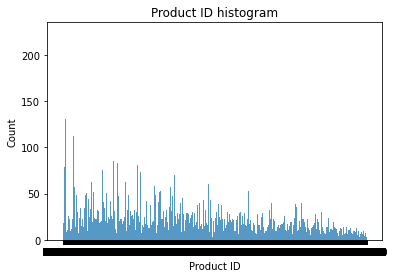

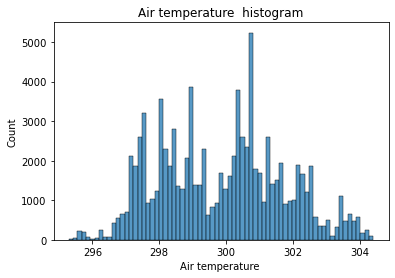

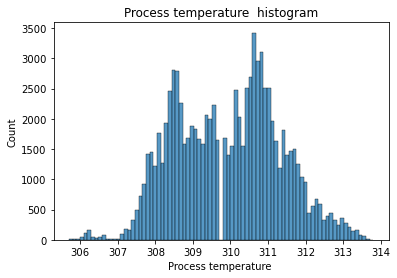

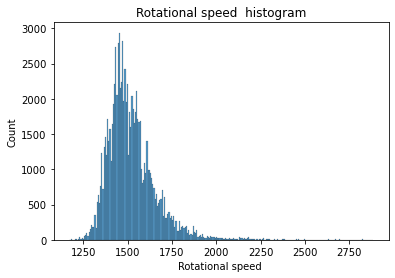

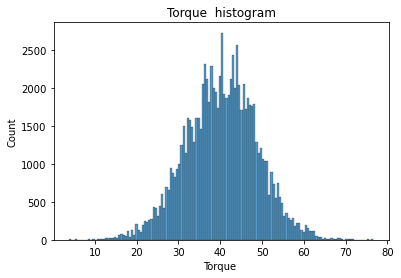

In [19]:
for col_name in num_features.columns:
    sns.histplot(num_features[col_name])
    plt.title(f'{col_name} histogram')
    plt.show()



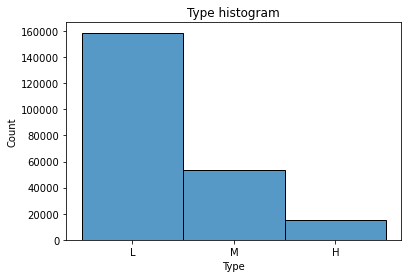

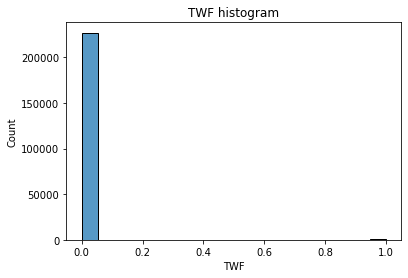

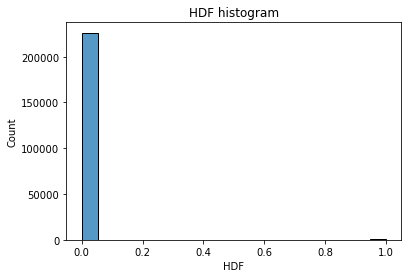

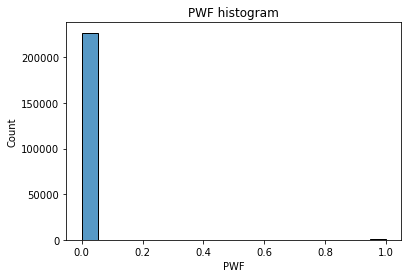

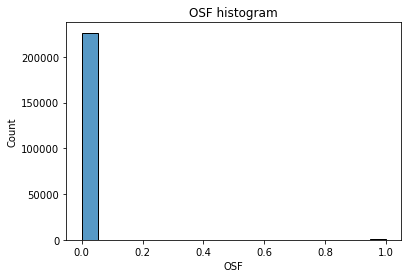

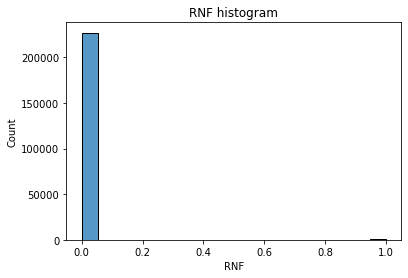

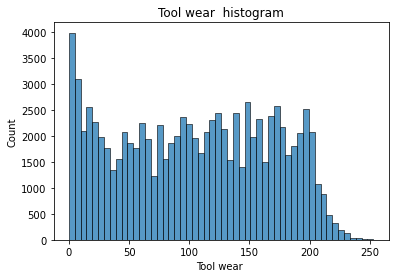

In [20]:
for col_name in cat_features.columns:
    sns.histplot(cat_features[col_name])
    plt.title(f'{col_name} histogram')
    plt.show()

